In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [6]:
dataset=pd.read_csv("Algerian_forest_fires_dataset.csv")
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [9]:
# DATA CLEANING

In [10]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


# The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region
"Bejaia Region Dataset"
"Sidi-Bel Abbes Region Dataset"
Add new column with region

In [11]:
dataset.loc[:123,"Region"]=0
dataset.loc[123:,"Region"]=1
df = dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [14]:
# Note: Region has float data. we will convert it into int. see below 👇

In [15]:
df[["Region"]]=df[["Region"]].astype(int)

In [16]:
df.head(124)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# see till row 122 in region col has 0, else below 1


In [17]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [18]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [19]:
## Removing the null values
df = df.dropna().reset_index(drop=True)

In [20]:
# see all the null values has removed now.
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [21]:
df.iloc[[122]]
# df.iloc[122:123,:] also use this same code as above.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [22]:
# Note:
# In the above code see that 122 which was blank row before dropna.
# now it copy the column values after dropna.
# but it's not proper record. so we will delete it.

In [23]:
# df.iloc[120:126,:]

In [24]:
## remove the 122nd row
df = df.drop(122).reset_index(drop=True)

In [25]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [26]:
df.iloc[120:126,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1


In [27]:
df.columns
# see the extra spaces in col names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [28]:
## fix spaces in columns names
# it will remove extra spaces in col names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


Changes the required columns as integer data types
# 

In [30]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [31]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month', 'day', 'year','Temperature','RH','Ws']].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [33]:
# Now, we can Rain, FFMC, DMC, DC, ISI, BUI, FWI in float
# bcoz see below code. It has float values 👇

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [35]:
# Changing the other columns to float datatype

In [36]:
objects = [features for features in df.columns if df[features].dtypes == 'O']
# capital O --> means objects

In [37]:
objects


['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [38]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [39]:
df.info()
# see in this output. we did not convert Classes column in numerical data.
# bcoz this column is categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [40]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [41]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [43]:
# note: now we will save this dataset in another csv file.
# usually when we do features engineering. after doing this make a copy of this file.
# bcoz this file will be used in further model training.

In [44]:
## Let save the cleaned dataset
df.to_csv('Algeria_forest_fires_cleaned_dataset.csv', index = False)

# 3. Exploratory Data Analysis

In [45]:
# first of all, I am removing the day, month, year because I do not want to do too much
# focus on these volumes. so we drop it see below 👇

In [46]:
## drop day, month, and year
df_copy = df.drop(['day', 'month', 'year'], axis=1)
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [47]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
## categories in classes
df_copy['Classes'].value_counts()

# classes has only two categories. fire, not fire
# but it shows many categories in output bcoz of spaces in different words

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [49]:
# CONVERT
# NOT FIRE = 0 (0 INDICATE NOT FIRE)
# FIRE = 1 (1 INDICATE FIRE)
## Encoding of the categories in classes
df_copy['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [50]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [51]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [52]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [53]:
# note: 1 has 137 row
# and 0 has 106 rows.
# we can check it is correct or not.
# count the 1st value_count code, where fire and not fire has not categories in two part

In [54]:
## plot density plot for all features
# plt.style.use('seaborn')
# df_copy.hist(bins=50, figsize=(20,15))
# plt.show()

# THIS CODE GIVES ERROR BCOZ --> seaborn styles shipped by Matplotlib are depreciated sing 3.6
# onwards. see below correct code. 👇

# HISTOGRAM

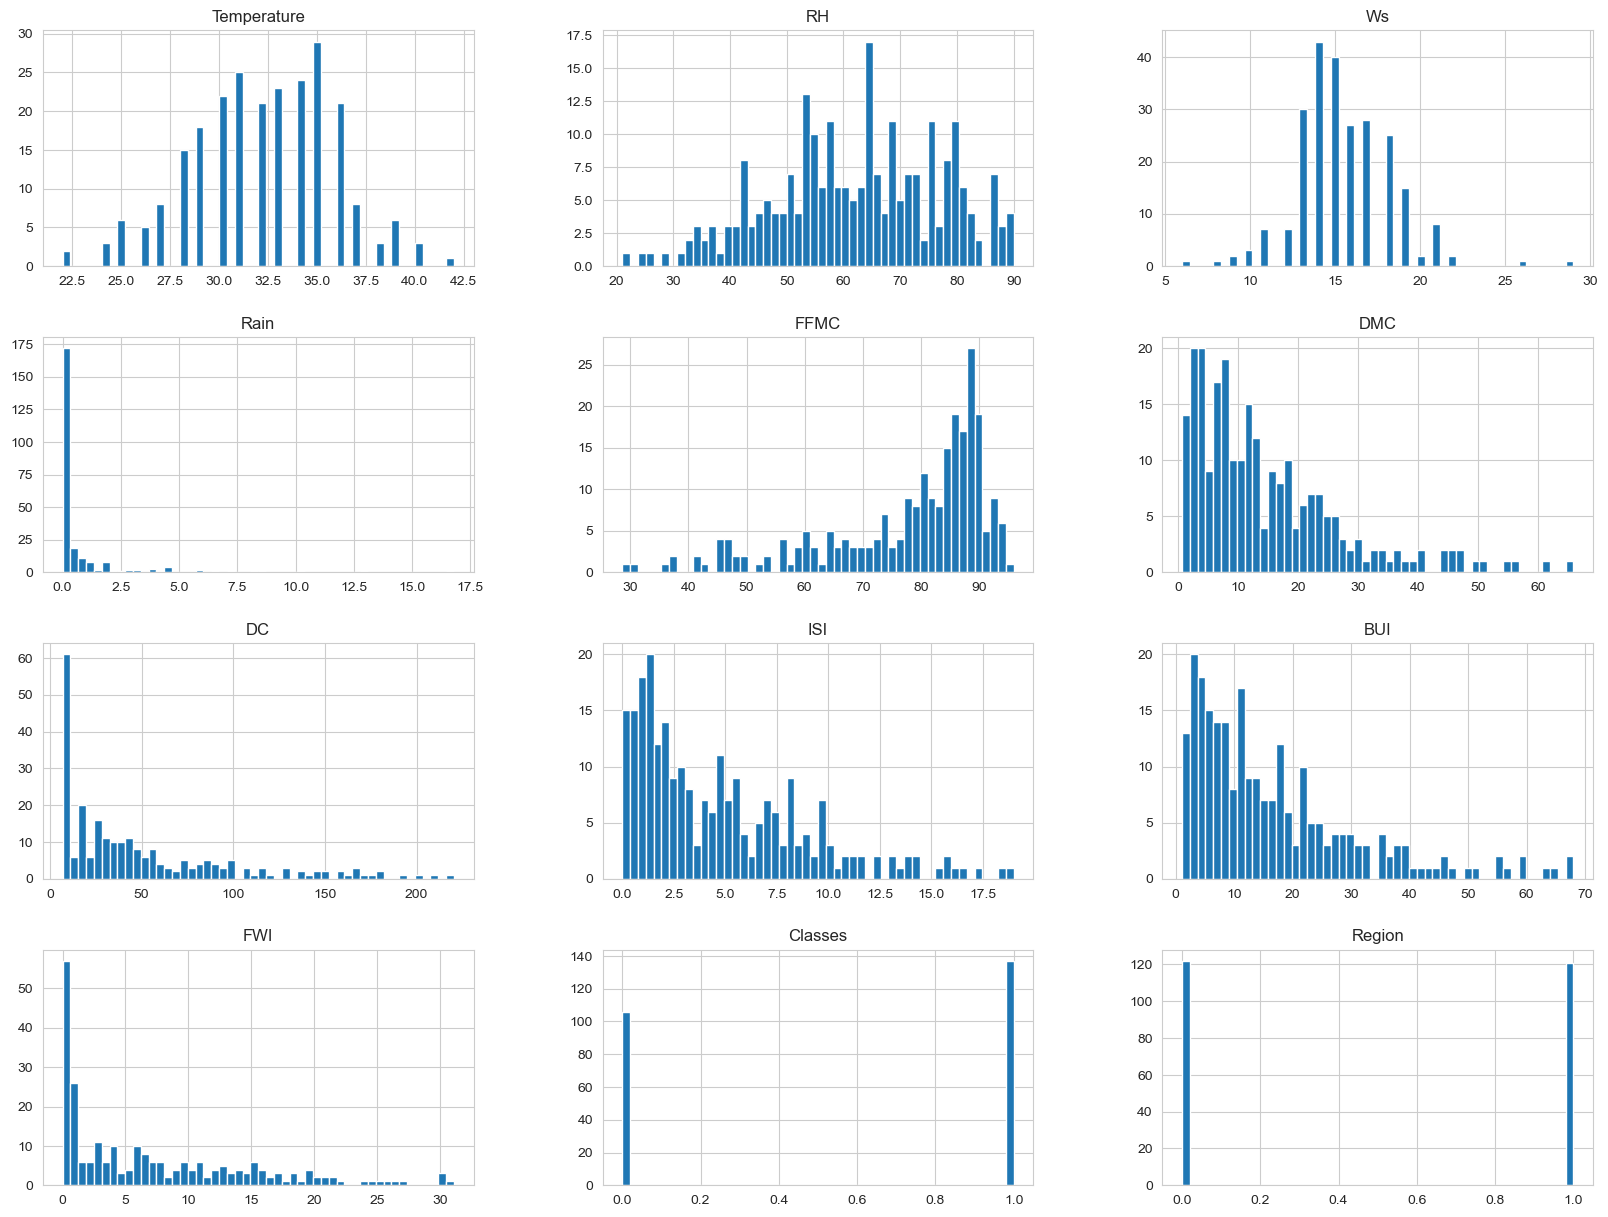

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style('whitegrid')

# Plot density plot for all features
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

# SEABORN STYLES

In [56]:
# Seaborn provides several built-in styles that you can choose from.
# Here are some of the available styles:

#     'darkgrid': Dark background with grid lines.
#     'whitegrid': White background with grid lines.
#     'dark': Dark background without grid lines.
#     'white': White background without grid lines.
#     'ticks': White background with ticks along the axes.

In [57]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

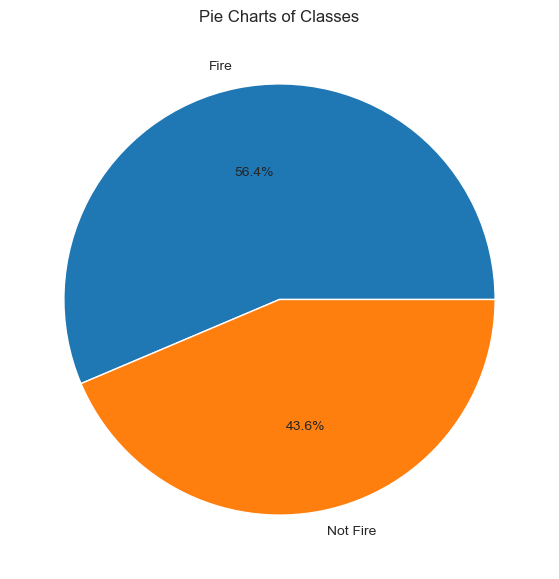

In [58]:
# Plotting piechart
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels = classlabels, autopct = '%1.1f%%')
plt.title("Pie Charts of Classes")
plt.show()

# Correlation

# df_copy.corr()

# HEATMAP

<Axes: >

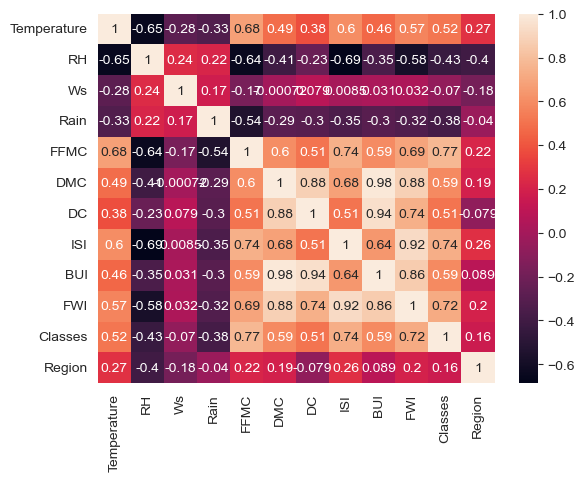

In [60]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: >

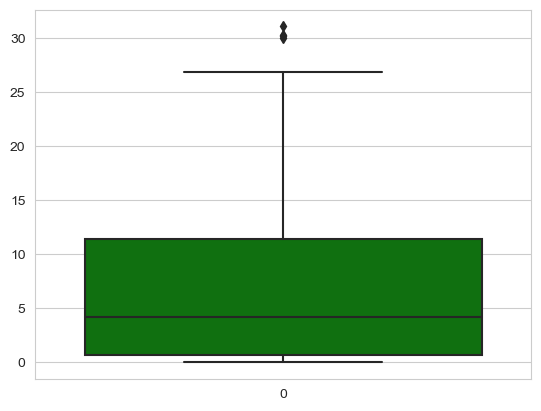

In [61]:
sns.boxplot(df_copy['FWI'], color = 'green')

In [62]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# 4. OBSERVATION AND ANALYSIS

In [63]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')
df['Classes']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241    not fire
242    not fire
Name: Classes, Length: 243, dtype: object

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

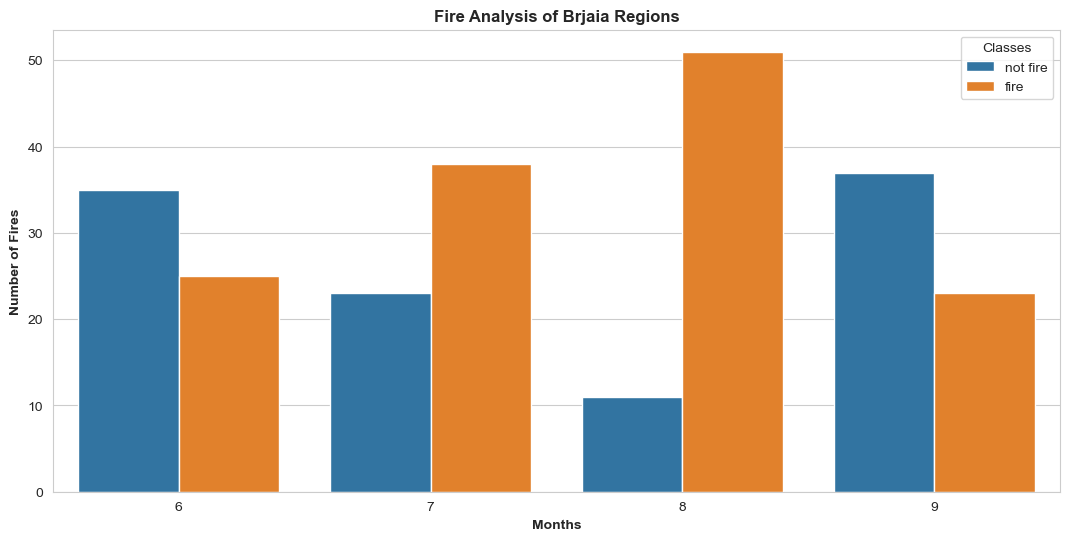

In [64]:
## Monthy Fire Analysis
dftemp = df_copy.loc[df['Region']] == 1
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data=df)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title("Fire Analysis of Brjaia Regions", weight = "bold")


# ts observed that August and September had the most numberr of forest fires for both regions. And from the above plot of months, we can understand few things.
Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.
Less Fires was on September.

In [65]:
#Observations 1. BUI and DMC are highly positvely correlated, so we will delete one feature i.e.,
#BUI
df_copy.drop('BUI', axis=1, inplace=True)

In [66]:
df_copy.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'Classes', 'Region'],
      dtype='object')

# 5. MODEL BUILDING

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [68]:
# Independent variable vs target variable distribution
# sns.scatterplot(data=df, x='data', y='Temperature', hue='Classes' )

In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   FWI          243 non-null    float64
 9   Classes      243 non-null    int32  
 10  Region       243 non-null    int32  
dtypes: float64(6), int32(5)
memory usage: 16.3 KB


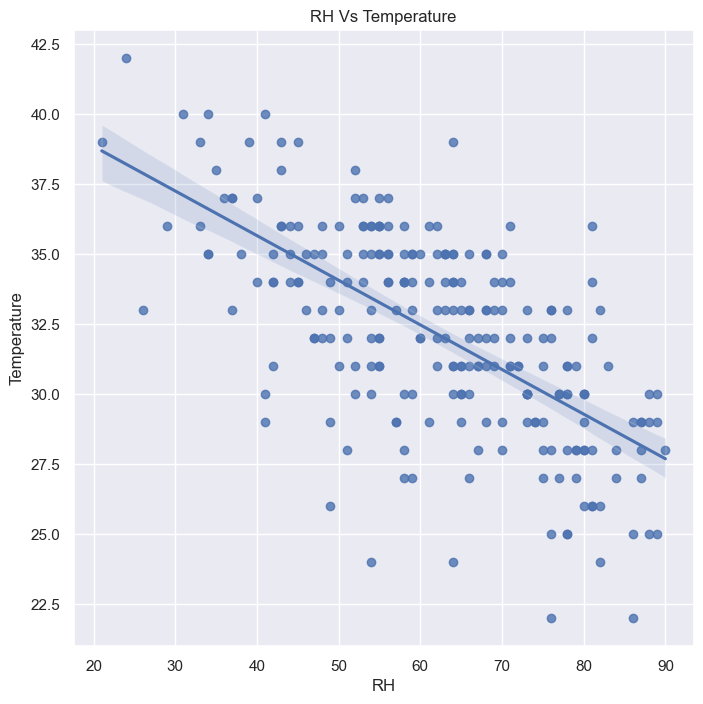

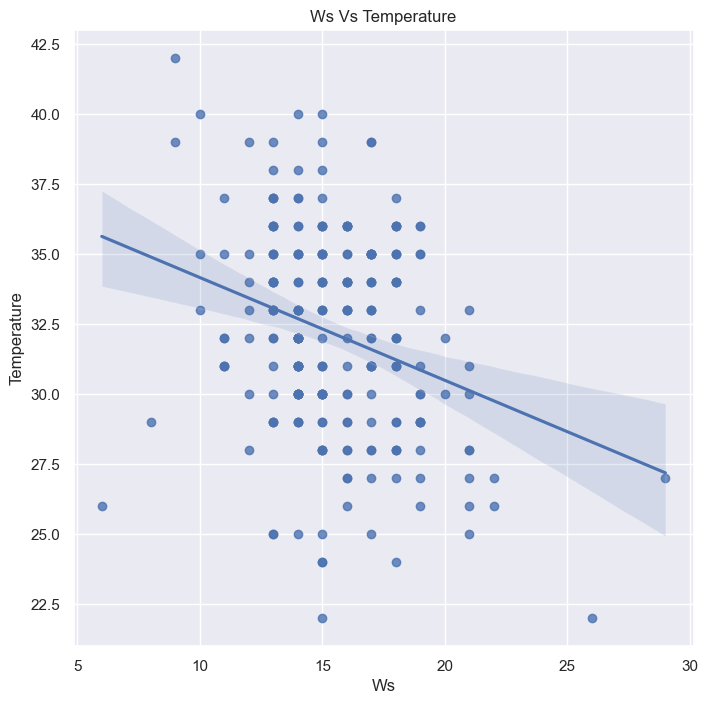

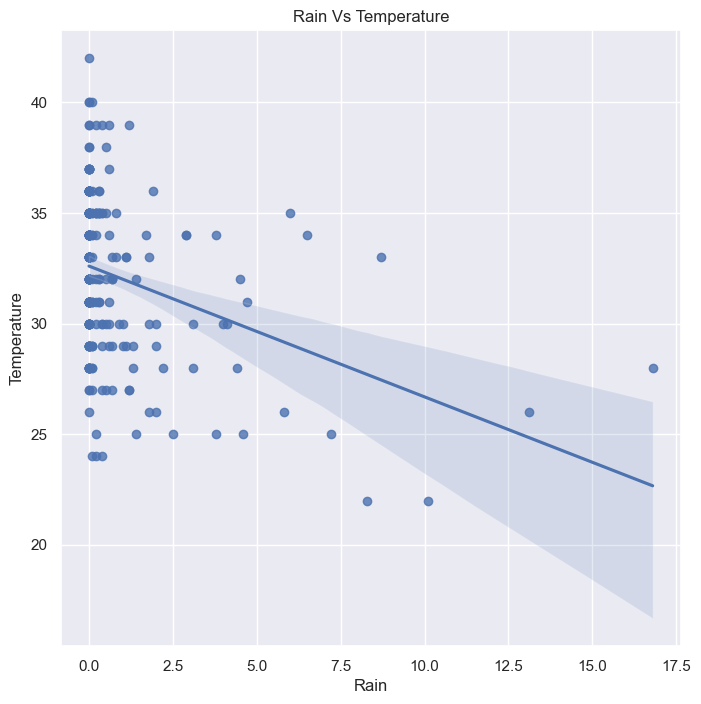

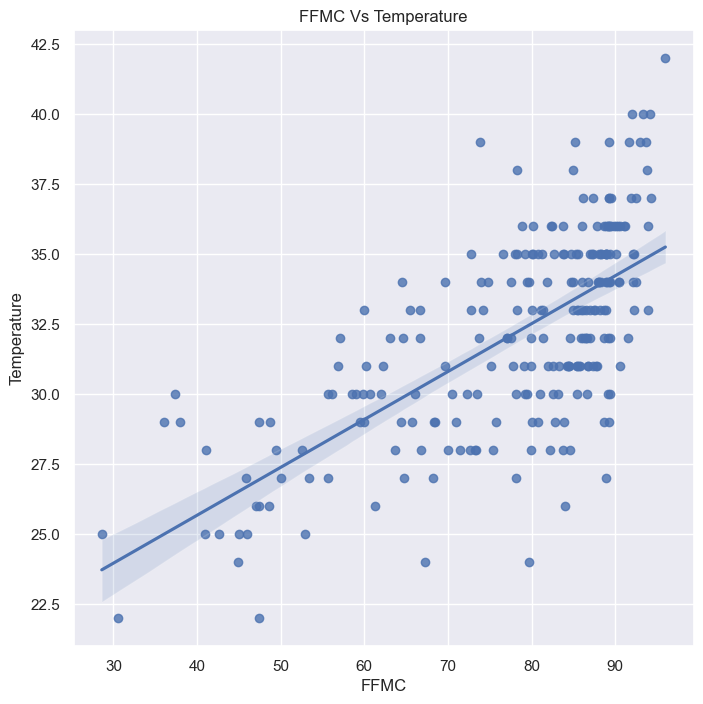

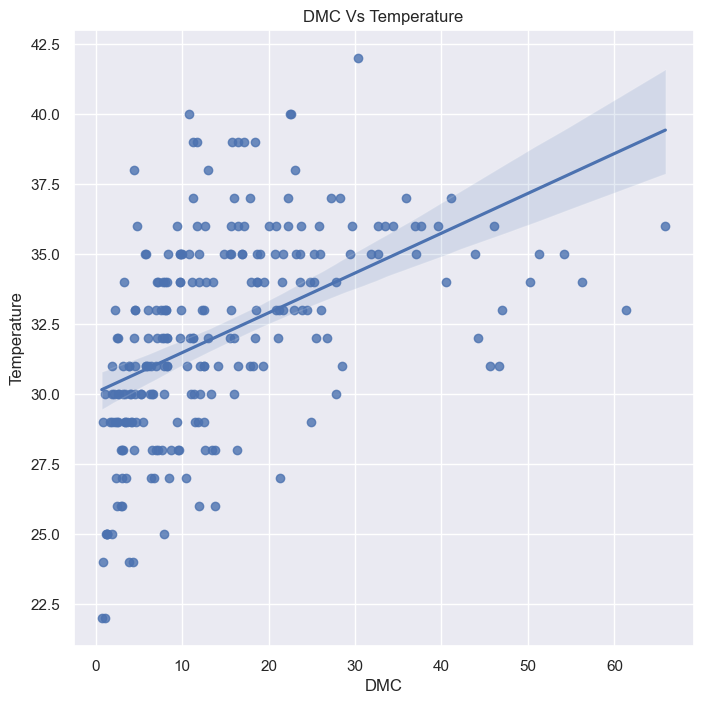

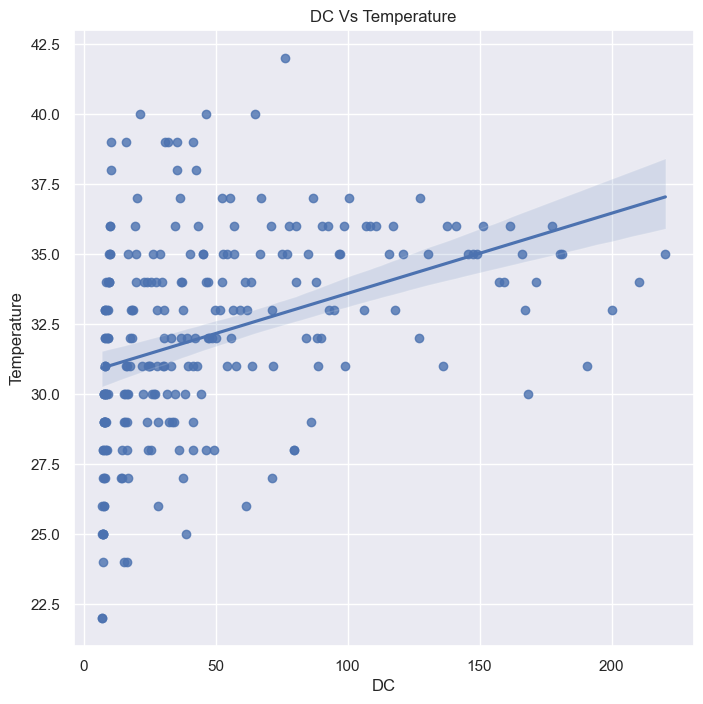

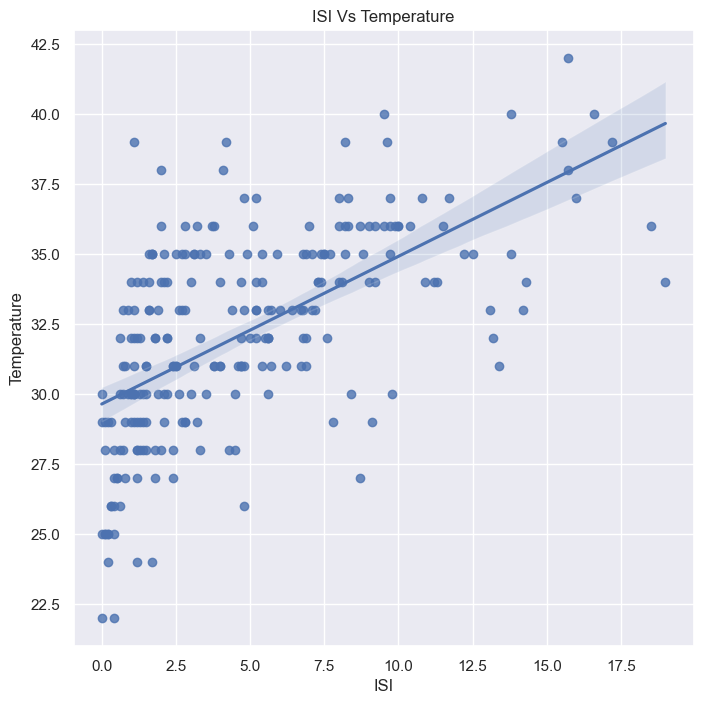

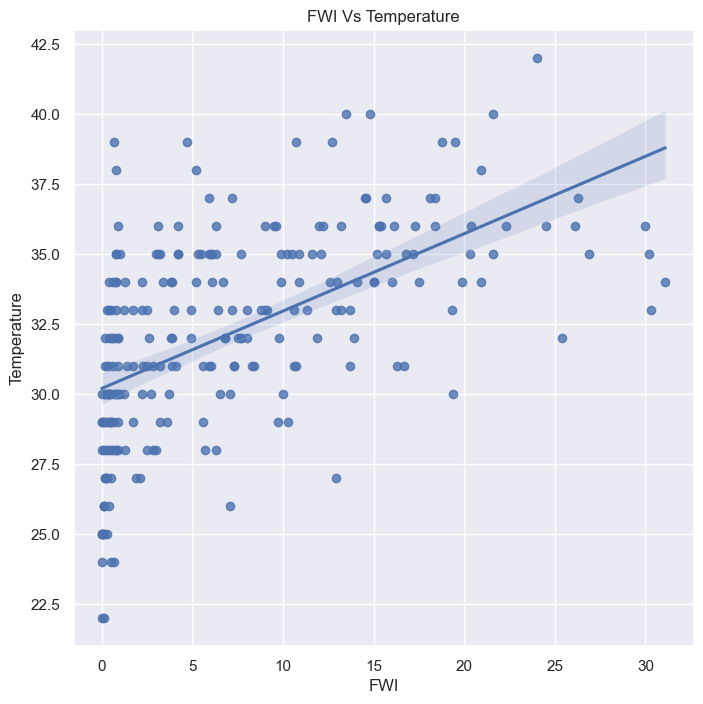

In [70]:
# Regression PLot
# #### shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in df_copy.columns if feature not in ['Temperature', 'data','Region', 'Classes']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df_copy[feature], y=df_copy['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.title("{} Vs Temperature".format(feature))
    plt.show();

In [71]:
# Segregate dependent and independent feature
### X independent features and y dependent feature
X= df_copy[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
'FWI', 'Classes', 'Region']]
y=df_copy[['Temperature']]

In [72]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,1.3,7.6,0.5,0,0
1,61,13,1.3,64.4,4.1,1.0,7.6,0.4,0,0
2,82,22,13.1,47.1,2.5,0.3,7.1,0.1,0,0
3,89,13,2.5,28.6,1.3,0.0,6.9,0.0,0,0
4,77,16,0.0,64.8,3.0,1.2,14.2,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...
238,65,14,0.0,85.4,16.0,4.5,44.5,6.5,1,1
239,87,15,4.4,41.1,6.5,0.1,8.0,0.0,0,1
240,87,29,0.5,45.9,3.5,0.4,7.9,0.2,0,1
241,54,18,0.1,79.7,4.3,1.7,15.2,0.7,0,1


In [73]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
238,30
239,28
240,27
241,24


In [74]:
#splitting the data into training and test dataset
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
# Scaling the feature
### creating a StandardScalar object
scaler=StandardScaler()
scaler

StandardScaler()

In [76]:
### Using fit_transform to standardise Train data
X_train=scaler.fit_transform(X_train)

In [77]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
X_test=scaler.transform(X_test)

In [79]:
# 6. LINEAR REGRESSION MODEL

In [80]:
## creating linear regression model
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [81]:
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [82]:
### Passing training data(X and y) to the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [83]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [[-1.20439215 -0.70863044  0.29093509  1.50245738  0.23891198  0.58556497
   0.52276842 -0.62801601 -0.15355082 -0.12734572]]
2. Intercept of best fit hyper plane is [32.09876543]


In [84]:
linear_reg_pred=linear_reg.predict(X_test)

In [85]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

Text(0, 0.5, 'Predicted data')

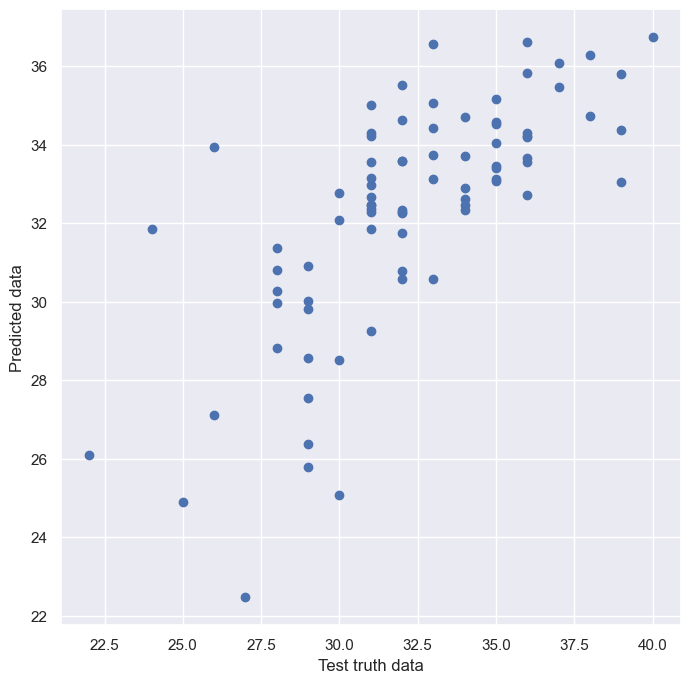

In [86]:
# Validation of Linear Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

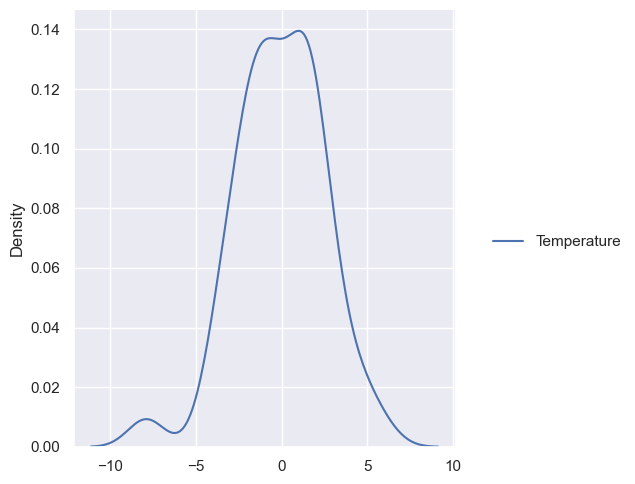

In [87]:
# 2. Residual should be normally distributed
sns.displot(data=residual_linear_reg, kind='kde')

Text(0, 0.5, 'Residuals')

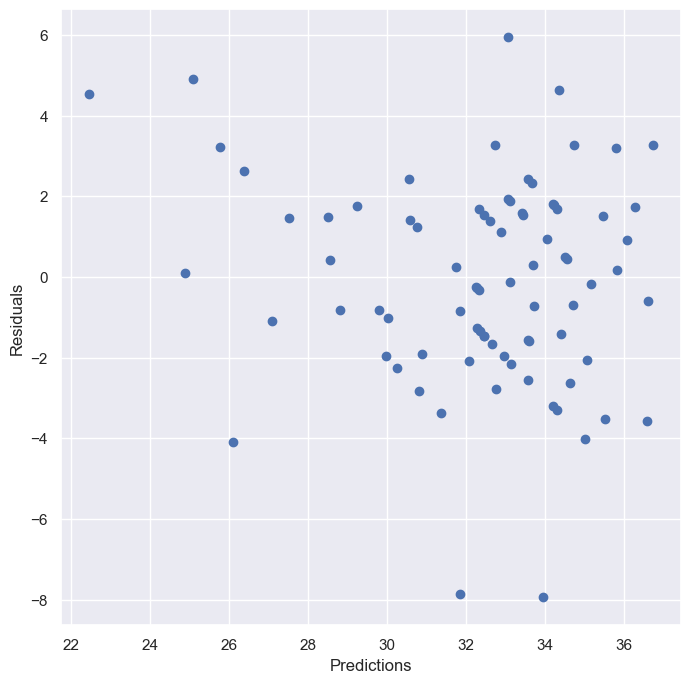

In [88]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [89]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 6.48
MAE :2.03
RMSE : 2.54


In [90]:
# Performance Metrics
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjustedR-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 49.54 % 
AdjustedR-Squared Accuracy : 42.33%


# 7. Ridge Regresion Model

In [91]:
## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [92]:
### Passing training data(X and y) to the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [93]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.20077904 -0.70252451  0.27682127  1.48506964  0.19224454  0.48035197
   0.49191122 -0.46787562 -0.13757628 -0.12016484]]
2. Intercept of best fit hyper plane is [32.09876543]


In [94]:
# Prediction of test data
ridge_reg_pred=ridge_reg.predict(X_test)

In [95]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

Text(0, 0.5, 'Predicted data')

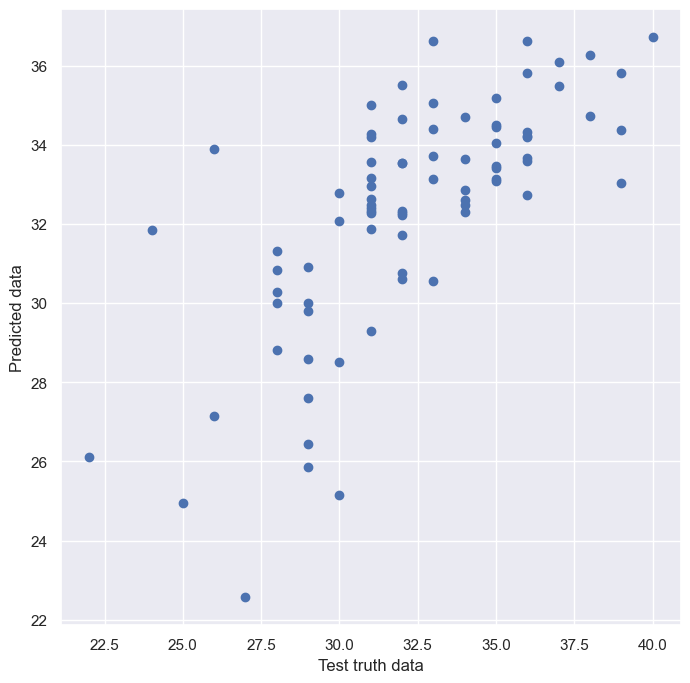

In [96]:
# Validation of Ridge Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

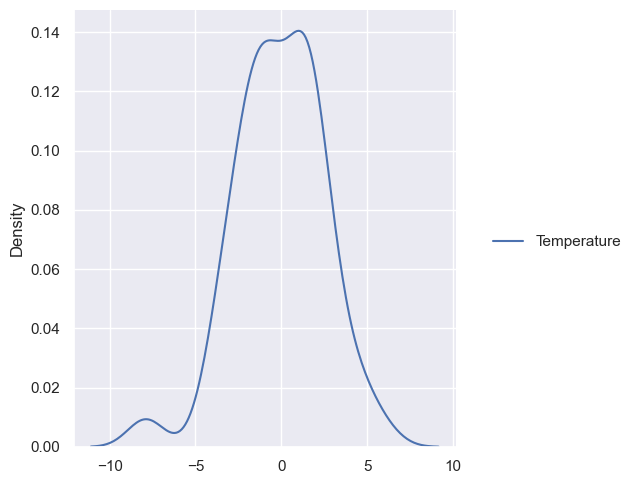

In [97]:
#2. Residual should be normally distributed
sns.displot(data = residual_ridge_reg, kind='kde')

Text(0, 0.5, 'Residuals')

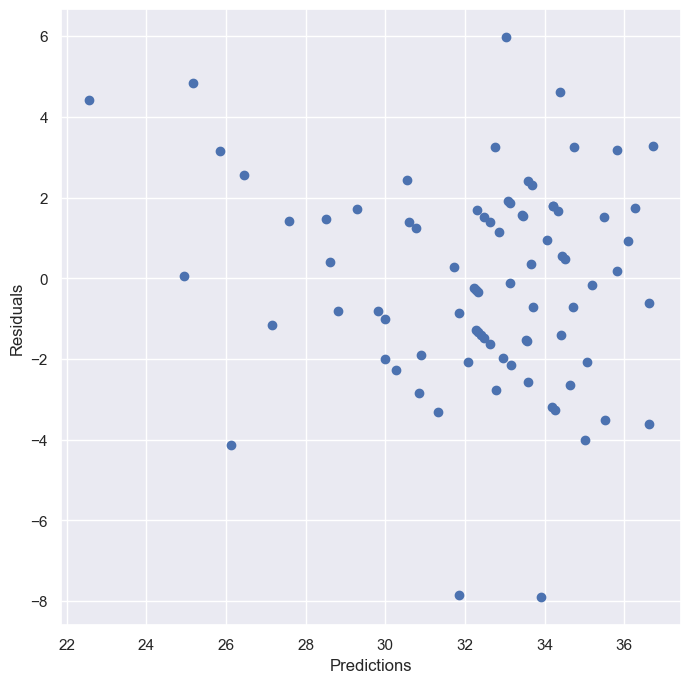

In [98]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [99]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")

MSE : 6.43
MAE :2.02
RMSE : 2.54


In [100]:
# Performance Metrics
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 49.888 % 
Adjusted R-Squared Accuracy : 42.73%


# 8. Lasso Regression Model

In [101]:
## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [102]:
### Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [103]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.71322387 -0.         -0.          1.0466751   0.          0.
  0.          0.          0.          0.        ]
2. Intercept of best fit hyper plane is [32.09876543]


In [104]:
lasso_reg_pred=lasso_reg.predict(X_test)

In [105]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

Text(0, 0.5, 'Predicted data')

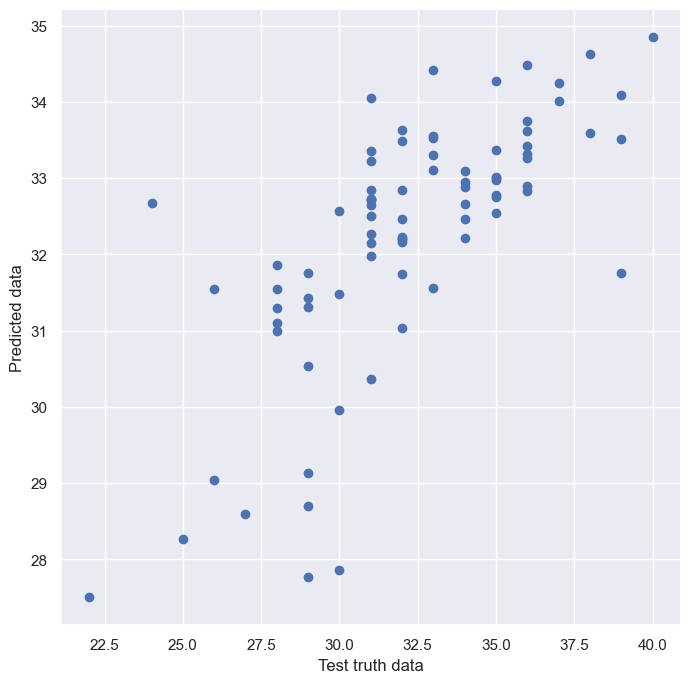

In [106]:
# Validation of Lasso Regression assumptions
# 1. Linear Relationship
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

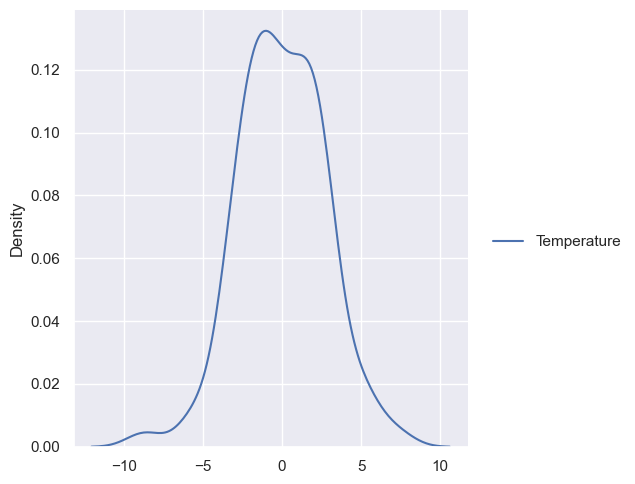

In [107]:
# 2. Residual should be normally distributed
sns.displot( data = residual_lasso_reg, kind='kde')

Text(0, 0.5, 'Residuals')

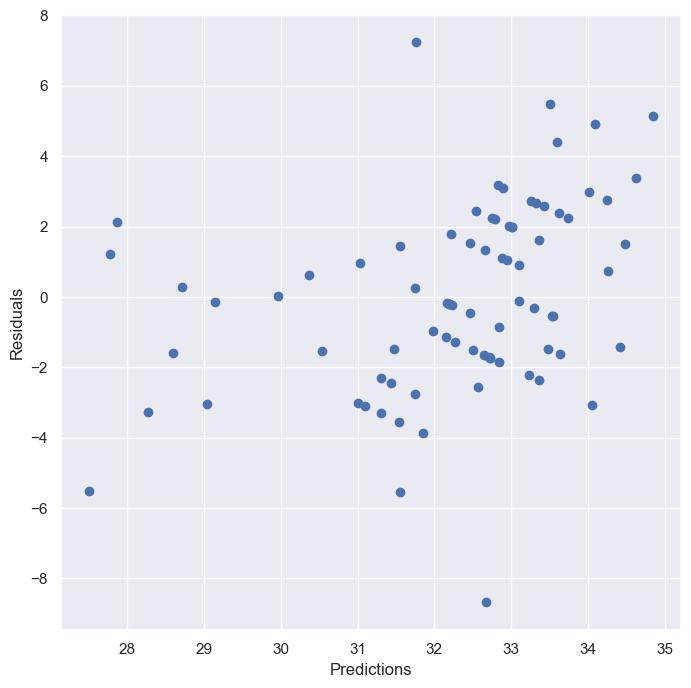

In [108]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [109]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")


MSE : 7.18
MAE :2.14
RMSE : 2.68


In [110]:
# Performance Metrics
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjustedR-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 44.078 % 
AdjustedR-Squared Accuracy : 36.09%


# 9. Elastic Net Regression Model

In [111]:
## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [112]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [113]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.
  coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.
  intercept_))

1. Co-efficients of independent features is [-0.67521085 -0.20163948 -0.          0.73591736  0.1105059   0.23805459
  0.          0.1707213   0.07985827  0.        ]
2. Intercept of best fit hyper plane is [32.09876543]


In [114]:
# Prediction of test data
elastic_reg_pred=elastic_reg.predict(X_test)

In [115]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg = pd.DataFrame(residual_elastic_reg)

Text(0, 0.5, 'Predicted data')

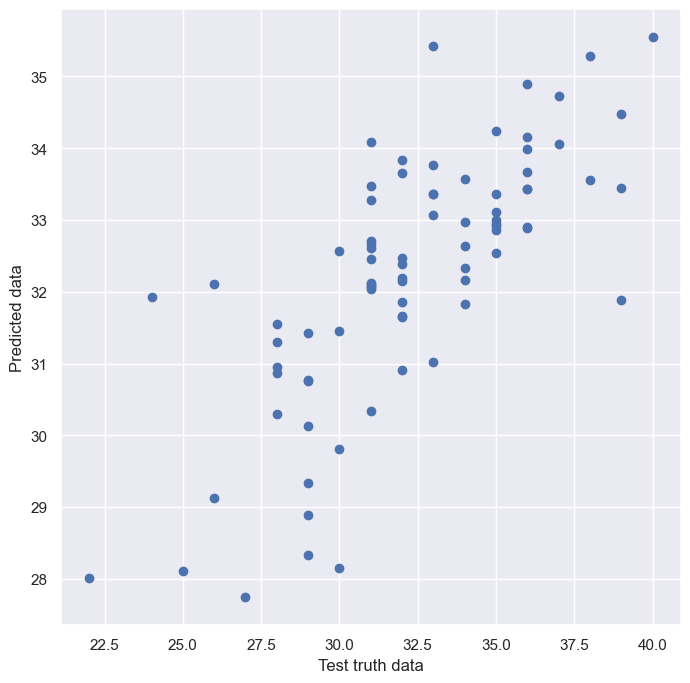

In [116]:
# Validation of Elastic Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

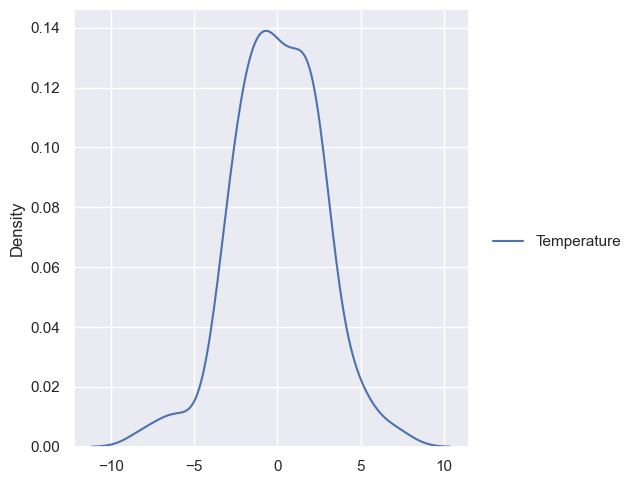

In [117]:
# 2. Residual should be normally distributed
sns.displot( data = residual_elastic_reg, kind='kde')

Text(0, 0.5, 'Residuals')

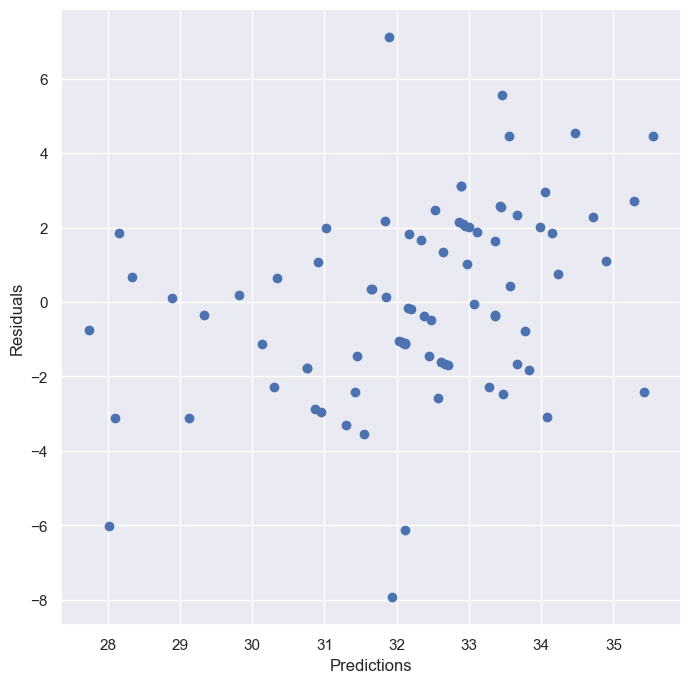

In [118]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [119]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, elastic_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")

MSE : 6.64
MAE :2.04
RMSE : 2.58


In [120]:
# Performance Metrics
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(elastic_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 48.279 % 
Adjusted R-Squared Accuracy : 40.89%


In [121]:
# Comparisions of all Models
# cost function values
print(f"--------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :{round(mean_squared_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}")
print(f"---------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression : {round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}")
print(f"--------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n3. Lasso Regression :{round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n4. Elastic Net Regression : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")
print(f"--------------------------------------")

--------------------------------------
MSE:
1. Linear Regression : 6.48
2. Ridge Regression : 6.43
3. Lasso Regression :7.18
4. Elastic Net Regression : 6.64
---------------------------------------
MAE:
1. Linear Regression : 2.03
2. Ridge Regression :2.02
3. Lasso Regression : 2.14
4. Elastic Net Regression : 2.04
--------------------------------------
RMSE:
1. Linear Regression : 2.54
2. Ridge Regression : 2.54
3. Lasso Regression :2.68
4. Elastic Net Regression : 2.58
--------------------------------------


In [122]:
# Performance Metrics
print(f"--------------------------------------")
print(f"R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_r2_score*100,3)} %\n4. Elastic Net Regression :␣{round(elastic_reg_r2_score*100,3)} %")
print(f"--------------------------------------")
print(f"Adjusted R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_adj_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_adj_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_adj_r2_score*100,3)} %\n4. Elastic Net Regression :{round(elastic_reg_adj_r2_score*100,3)} %")
print(f"--------------------------------------")

--------------------------------------
R-Squared Accuracy:
1. Linear Regression :49.54 %
2. Ridge Regression :49.888 %
3. Lasso Regression :44.078 %
4. Elastic Net Regression :␣48.279 %
--------------------------------------
Adjusted R-Squared Accuracy:
1. Linear Regression :42.331 %
2. Ridge Regression :42.729 %
3. Lasso Regression :36.089 %
4. Elastic Net Regression :40.89 %
--------------------------------------


# 10. Conslusion

In [124]:
'''
• If we use the date feature without categorizing then our accuracy will be around 50 % and
after the inclusion of categorization it has increased to 66 %, though it is not so good.

• We can remove skewness from the data and also can use some method to handle imbalanced
data in Rain feature. This is just a basic model. I will add all the possible techniques to
improve accuracy in next session.
'''

'\n• If we use the date feature without categorizing then our accuracy will be around 50 % and\nafter the inclusion of categorization it has increased to 66 %, though it is not so good.\n\n• We can remove skewness from the data and also can use some method to handle imbalanced\ndata in Rain feature. This is just a basic model. I will add all the possible techniques to\nimprove accuracy in next session.\n'